In [9]:
%load_ext autoreload
%autoreload 2

In [24]:
import os
import sys

print(sys.path)

['', '/home/caleml/partial-labels/experiments/notebooks', '/home/caleml/partial-labels', '/usr/lib/python34.zip', '/usr/lib64/python3.4', '/usr/lib64/python3.4/plat-linux', '/usr/lib64/python3.4/lib-dynload', '/home/caleml/.local/lib/python3.4/site-packages', '/usr/lib64/python3.4/site-packages', '/usr/lib64/python3.4/_import_failed', '/usr/lib/python3.4/site-packages', '/usr/lib/python3.4/site-packages/IPython/extensions', '/home/caleml/.ipython']


In [23]:
import numpy as np
import tensorflow as tf

In [34]:
from data.pascalvoc.pascalvoc import PascalVOC, NB_CLASSES

In [11]:
from model.networks.baseline import Baseline
from model import metrics

In [36]:
import matplotlib
import matplotlib.pyplot as plt

In [37]:
import sklearn
sklearn.__version__

'0.20.2'

In [38]:
from experiments.launch import parse_options_file
from config import config_utils

Using TensorFlow backend.


ImportError: cannot import name 'parse_options_file'

## val dataset

In [7]:
dataset_path = '/share/DEEPLEARNING/datasets/pascalvoc/'
dataset_val = PascalVOC(dataset_path, 2510, 'val', x_keys=['image'], y_keys=['multilabel'])
print(len(dataset_val))

1


In [8]:
x_val, y_val = dataset_val[0]

## eval

In [26]:
# partial_folder = '/home/caleml/partial_experiments/exp_20190624_1613_baseline'
partial_folder = '/home/caleml/partial_experiments/exp_20190627_1641_baseline'
model_weights = {
    # 'model_10': os.path.join(partial_folder, 'weights_10_006.h5'),
    # 'model_20': os.path.join(partial_folder, 'weights_20_020.h5'),
    # 'model_30': os.path.join(partial_folder, 'weights_30_003.h5'),
    'model_100': '/home/caleml/partial_experiments/exp_20190621_1834_baseline/weights_007.h5'
}

In [27]:
# config loading
# conf = parse_options_file(os.path.join(partial_folder, 'config.yaml'))
conf = parse_options_file('/home/caleml/partial-labels/config/baseline101.yaml')
config_utils.update_config(conf)


Loaded config

{'archi': {'classifier': 'resnet101', 'loss': 'bce', 'name': 'baseline'},
 'batch_size': 8,
 'dataset': {'name': 'pascalvoc',
             'path': '/share/DEEPLEARNING/datasets/pascalvoc/'},
 'training': {'n_epochs': 20}}



In [28]:
# eval loop

for model_name, model_path in model_weights.items():
    print('Doing model %s' % model_name)  
    model = Baseline(None, NB_CLASSES)
    model.load_weights(model_path)
    
    y_pred = model.predict(x_val)
    print('y pred example %s' % str(y_pred[0]))
    
    map_metric = metrics.MAP()
    map_2 = metrics.calculate_map(y_val[0], y_pred)
    print('map2 %s' % map_2)
    ap_scores = map_metric.compute_separated(y_val[0], y_pred)
    # ap_scores = map_metric.compute_separated(y_pred, y_val[0])
    print('ap scores for %s: %s' % (model_name, str(ap_scores)))
    map_score = sum(ap_scores) / len(ap_scores)

    print('%s: %s' % (model_name, map_score))

Doing model model_100
Outputs shape (None, 20)
Final model summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     (None, 448, 448, 3)       0         
_________________________________________________________________
cls_model (Model)            (None, 14, 14, 2048)      42658176  
_________________________________________________________________
flatten_5 (Flatten)          (None, 401408)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 20)                8028180   
Total params: 50,686,356
Trainable params: 50,581,012
Non-trainable params: 105,344
_________________________________________________________________
y pred example [0.05703787 0.03876966 0.06486665 0.02170656 0.06401902 0.03992372
 0.23413308 0.05507912 0.07292669 0.02245397 0.03004029 0.11245652
 0.06244062 0.03530599 0.33977216 0.0383

In [ ]:
# print(y_val)
print(type(y_val[0]))
print(y_val[0].shape)
print(y_pred_100.shape)

print(y_pred_100[-1])
print(y_pred_100[2])

print(y_pred_10[-1])
print(y_pred_10[2])

print(y_pred_20[-1])
print(y_pred_20[2])

In [20]:
print(y_val[0][0])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## plot mAP

In [10]:
folder = '%s/partial_experiments/exp_20190628_0305_TEST_script' % os.environ['HOME']

In [13]:
from pprint import pprint

In [14]:
maps = dict()
exp_pct = 0
exp_maps = None

with open(os.path.join(folder, 'map.csv'), 'r') as f_in:
    for line in f_in:
        parts = line.split(',')
        epoch = parts[0]
        mAP = parts[1]
        
        if int(epoch) == 0:
            if exp_maps is not None:
                maps[exp_pct] = exp_maps
            
            exp_pct += 10
            exp_maps = list()
        
        exp_maps.append(mAP)
        
pprint(maps)
            
            
            
        

{10: ['0.082854',
      '0.090330',
      '0.077200',
      '0.074622',
      '0.086840',
      '0.087163',
      '0.099346',
      '0.103206',
      '0.097967',
      '0.098725',
      '0.094966',
      '0.106462',
      '0.092181',
      '0.100632',
      '0.104738',
      '0.093290',
      '0.098259',
      '0.089205',
      '0.089280',
      '0.094230'],
 20: ['0.079084',
      '0.129775',
      '0.082999',
      '0.147525',
      '0.151059',
      '0.138826',
      '0.133107',
      '0.140380',
      '0.144374',
      '0.153689',
      '0.155001',
      '0.122372',
      '0.149584',
      '0.151518',
      '0.144176',
      '0.154426',
      '0.152721',
      '0.155205',
      '0.135074',
      '0.154221'],
 30: ['0.081828',
      '0.269140',
      '0.193136',
      '0.278663',
      '0.274600',
      '0.082818',
      '0.234682',
      '0.284238',
      '0.186499',
      '0.208869',
      '0.261126',
      '0.302739',
      '0.307479',
      '0.296791',
      '0.314388',
      '0

In [15]:
mAP_100 = 0.69

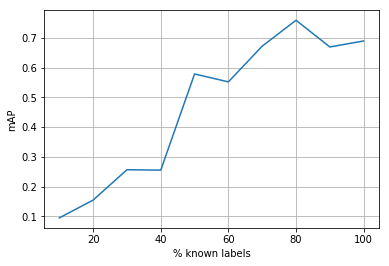

In [24]:
# Data for plotting
x = sorted(list(maps.keys()))
y = [float(maps[k][-1]) for k in x]

x += [100]
y += [mAP_100]

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='% known labels', ylabel='mAP')
ax.grid()

fig.savefig("test.png")
plt.show()

## partial vs bce

In [51]:
bce = {
    100: '/home/caleml/partial_experiments/exp_20190722_1214_baseline',
    90: '/home/caleml/partial_experiments/exp_20190722_1233_baseline',
    80: '/home/caleml/partial_experiments/exp_20190722_1413_baseline',
    70: '/home/caleml/partial_experiments/exp_20190722_1233_baseline',
    60: '/home/caleml/partial_experiments/exp_20190722_1413_baseline',
    50: '/home/caleml/partial_experiments/exp_20190722_1233_baseline',
    40: '/home/caleml/partial_experiments/exp_20190722_1413_baseline',
    30: '/home/caleml/partial_experiments/exp_20190722_1233_baseline',
    20: '/home/caleml/partial_experiments/exp_20190722_1413_baseline',
    10: '/home/caleml/partial_experiments/exp_20190722_1233_baseline'
}

partial = {
    100: '/home/caleml/partial_experiments/exp_20190722_1208_TESTNB',
    90: '/home/caleml/partial_experiments/exp_20190722_1235_TESTNB',
    80: '/home/caleml/partial_experiments/exp_20190722_1434_baseline/',
    70: '/home/caleml/partial_experiments/exp_20190722_1318_baseline',
    60: '/home/caleml/partial_experiments/exp_20190722_1416_TESTNB',
    50: '/home/caleml/partial_experiments/exp_20190722_1346_TESTNB',
    40: '/home/caleml/partial_experiments/exp_20190722_1359_baseline',
    30: '/home/caleml/partial_experiments/exp_20190722_1350_baseline',
    20: '/home/caleml/partial_experiments/exp_20190722_1444_baseline',
    # 10: '/home/caleml/partial_experiments/exp_20190722_1257_TESTNB'
}

In [52]:
coco_partial = {
    100: '/home/caleml/partial_experiments/tensorboard/exp_20190723_0029_baseline',
    90: '/home/caleml/partial_experiments/exp_20190723_0133_baseline'
}

coco_bce= {
    100: '/home/caleml/partial_experiments/exp_20190723_0050_TESTNB',
    90: '/home/caleml/partial_experiments/exp_20190723_0130_baseline'
}

In [112]:
# PascalVOC 448 + LRS (sgd 0.01 -> 0.001@10)
pv_bce = {
    100: '/home/caleml/partial_experiments/exp_20190725_1516_baseline',
    90: '/home/caleml/partial_experiments/exp_20190725_1710_baseline',
    # 80: '/home/caleml/partial_experiments/exp_20190726_1531_baseline',
    70: '/home/caleml/partial_experiments/exp_20190725_1710_baseline',
    # 60: '/home/caleml/partial_experiments/exp_20190726_1531_baseline',
    50: '/home/caleml/partial_experiments/exp_20190725_1710_baseline',
    # 40: '/home/caleml/partial_experiments/exp_20190726_1531_baseline',
    30: '/home/caleml/partial_experiments/exp_20190726_1126_baseline',
    20: '/home/caleml/partial_experiments/exp_20190726_1126_baseline',
    10: '/home/caleml/partial_experiments/exp_20190726_1126_baseline'
    
}

pv_pbce = {
    100: '/home/caleml/partial_experiments/exp_20190726_1141_baseline',
    90: '/home/caleml/partial_experiments/exp_20190725_1711_baseline',
    # 80: '/home/caleml/partial_experiments/exp_20190726_1532_baseline',
    70: '/home/caleml/partial_experiments/exp_20190725_1711_baseline',
    # 60: '/home/caleml/partial_experiments/exp_20190726_1532_baseline',
    50: '/home/caleml/partial_experiments/exp_20190725_1711_baseline',
    40: '/home/caleml/partial_experiments/exp_20190726_1532_baseline',
    30: '/home/caleml/partial_experiments/exp_20190725_1711_baseline',
    20: '/home/caleml/partial_experiments/exp_20190726_1127_baseline',
    10: '/home/caleml/partial_experiments/exp_20190726_1127_baseline'
}

In [72]:
# MSCoco 448 + LRS (sgd 0.01 -> 0.001@10)
cc_bce = {
    100: '/home/caleml/partial_experiments/exp_20190729_1635_baseline',
    90: '/home/caleml/partial_experiments/exp_20190729_1718_baseline',
    70: '/home/caleml/partial_experiments/exp_20190730_1451_baseline',
    50: '/home/caleml/partial_experiments/exp_20190731_1119_baseline'
}

cc_pbce = {
    100: '/home/caleml/partial_experiments/exp_20190729_1614_baseline',
    90: '/home/caleml/partial_experiments/exp_20190729_1720_baseline',
    70: '/home/caleml/partial_experiments/exp_20190730_1452_baseline'
}

In [113]:
def find_map_data(folders):
    # key: percent // val: best mAP
    maps = dict()
    
    for pct, exp_folder in folders.items():
        best_epoch = None
        best_map = 0
        
        with open(os.path.join(exp_folder, 'map.csv'), 'r') as f_in:
        
            for line in f_in:
                parts = line.split(',')

                if len(parts) == 23:
                    if int(parts[0]) != pct:
                        continue
                    epoch = int(parts[1])
                    mAP = float(parts[2])

                elif len(parts) == 22:
                    epoch = int(parts[0])
                    mAP = float(parts[1])
                    
                if mAP > best_map:
                    best_map = mAP
                    best_epoch = epoch

        print("for percent %s, best map is %s at epoch %s" % (pct, best_map, best_epoch))
        maps[pct] = best_map
    
    return maps

In [114]:
bce_maps = find_map_data(pv_bce)
partial_maps = find_map_data(pv_pbce)

for percent 50, best map is 0.864272 at epoch 19
for percent 100, best map is 0.880162 at epoch 19
for percent 70, best map is 0.874514 at epoch 19
for percent 20, best map is 0.835823 at epoch 19
for percent 90, best map is 0.87457 at epoch 19
for percent 10, best map is 0.785676 at epoch 19
for percent 30, best map is 0.849913 at epoch 19
for percent 50, best map is 0.888014 at epoch 18
for percent 100, best map is 0.879263 at epoch 19
for percent 70, best map is 0.899833 at epoch 19
for percent 40, best map is 0.884248 at epoch 19
for percent 20, best map is 0.863204 at epoch 13
for percent 90, best map is 0.895631 at epoch 19
for percent 10, best map is 0.819686 at epoch 17
for percent 30, best map is 0.873455 at epoch 7


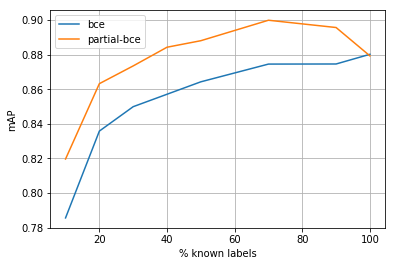

In [115]:
# Data for plotting
x_bce = sorted(list(bce_maps.keys()))
y_bce = [float(bce_maps[k]) for k in x_bce]

x_partial = sorted(list(partial_maps.keys()))
y_partial = [float(partial_maps[k]) for k in x_partial]


fig, ax = plt.subplots()
ax.plot(x_bce, y_bce, label='bce')
ax.plot(x_partial, y_partial, label='partial-bce')

ax.set(xlabel='% known labels', ylabel='mAP')
ax.legend()
ax.grid()

fig.savefig("eval_partial.png")
plt.show()

## Load and compute

In [117]:
from data.coco.coco import CocoGenerator


In [118]:
prop = 100

In [119]:
data_dir = '/share/DEEPLEARNING/datasets/mscoco'
# data_dir = '/home/caleml/datasets/mscoco'
dataset_test = CocoGenerator('val', data_dir)

loading dataset from /share/DEEPLEARNING/datasets/mscoco/annotations/multilabel_val2014.csv


In [ ]:
# BatchNormalizationV1??
from tensorflow.keras.models import load_model
model_path = '/home/caleml/partial_experiments/exp_20190729_1614_baseline/model_100_020.h5'
model = load_model(model_path)

In [95]:
# load model
weights_path = '/home/caleml/partial_experiments/exp_20190729_1614_baseline/weights_100_020.h5'
config_path = '/home/caleml/partial-labels/config/coco_baseline50_sgd_448lrs.yaml'
model = Baseline('/home/caleml/partial_experiments/', 80)
model.load_weights(weights_path, build_args={'p': prop / 100}, config_file=config_path)

Init input_shape (448, 448, 3)
Loading options

Loaded config

{'archi': {'classifier': 'resnet50', 'loss': 'bce', 'name': 'baseline'},
 'batch_size': 16,
 'callbacks': {'lr_factor': 0.1, 'lr_trigger': [10]},
 'dataset': {'name': 'coco',
             'path': '/share/DEEPLEARNING/datasets/mscoco/',
             'test': 'val',
             'train': 'train'},
 'image': {'img_size': 448},
 'training': {'n_epochs': 20, 'optimizer': 'sgd', 'start_lr': 0.01}}



/home/caleml/.local/lib/python3.4/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Outputs shape (None, 80)
Final model summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     (None, 448, 448, 3)       0         
_________________________________________________________________
cls_model (Model)            (None, 14, 14, 2048)      23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 80)                163920    
Total params: 23,751,632
Trainable params: 23,698,512
Non-trainable params: 53,120
_________________________________________________________________


In [120]:
# load val dataset (/!\ LONG)
batch_size = len(dataset_test)
generator_test = dataset_test.flow(batch_size=batch_size)
print("test data length %s" % len(dataset_test))
X_test, Y_test = next(generator_test)

test data length 40504


MemoryError: 

In [ ]:
# execute mAP measures
from model import metrics
map_fn =  metrics.MAP()

y_pred = model.predict(X_test)
ap_scores = map_fn.compute_separated(Y_test, y_pred)
print('ap scores type %s' % type(ap_scores))
map_score = sum(ap_scores) / len(ap_scores)

with open(os.path.join(self.exp_folder, 'map.csv'), 'a') as f_out:
    line = '%d,%d,%6f,' % (prop, epoch, map_score) + ','.join([str(s) for s in ap_scores]) + '\n'
    f_out.write(line)

print("interval evaluation - epoch: {:d} - mAP score: {:.6f}".format(epoch, map_score))

In [101]:
def extract_folder_and_epoch(weights_path):
    parts = weights_path.split('/')
    parts_name = parts[-1].split('_')
    assert len(parts_name) == 3
    epoch = int(parts_name[1])
    
    exp_folder = '/'.join(parts[:-1])
    return exp_folder, epoch

In [103]:
exp_folder, epoch = extract_folder_and_epoch(weights_path)
print(exp_folder)
print(epoch)

/home/caleml/partial_experiments/exp_20190729_1614_baseline
100


## Test eval stream

In [5]:
from data.coco.coco2 import CocoGenerator

In [6]:
data_dir = '/home/caleml/datasets/mscoco/'

In [33]:
dataset_val = CocoGenerator(data_dir, 16, 'val', x_keys=['image', 'image_id'], y_keys=['multilabel'], year='2014')

loading dataset from /home/caleml/datasets/mscoco/annotations/multilabel_val2014.csv


### model

In [13]:
prop = 100

In [32]:
weights_path = '/home/caleml/partial_experiments/exp_20190729_1614_baseline/weights_%s_020.h5' % prop
model = Baseline('/home/caleml/partial_experiments/', 80)
model.load_weights(weights_path)

Init input_shape (448, 448, 3)
Loading options
{'ARCHI': {'CLASSIFIER': 'resnet50', 'LOSS': 'bce', 'NAME': 'baseline'},
 'BATCH_SIZE': 16,
 'CALLBACK': {'LR_FACTOR': 0.1,
              'LR_TRIGGER': [10],
              'MIN_DELTA': 0.0,
              'PATIENCE': 10,
              'PATIENCE_LR': 2,
              'TENSORBOARD': {'SAVE_GRAPH': True, 'USE_TENSORBOARD': False},
              'VAL_CB': None},
 'CALLBACKS': {'LR_FACTOR': 0.1, 'LR_TRIGGER': [10]},
 'DATAAUGMENTATION': {'DEFAULT_DICT': {'HORIZONTAL_FLIP': True,
                                       'horizontal_flip': True}},
 'DATASET': {'NAME': 'coco',
             'PATH': '/share/DEEPLEARNING/datasets/mscoco/',
             'SHUFFLE': True,
             'TEST': 'val',
             'TRAIN': 'train'},
 'DEBUG': {'IS_TEST': False},
 'EPSILON': 1e-07,
 'IMAGE': {'IMG_SIZE': 448, 'N_CHANNELS': 3},
 'MULTIP': {'MAX_QUEUE_SIZE': 10, 'N_WORKERS': 2, 'USE_MULTIPROCESS': False},
 'RANDOM_SEED': 1,
 'RELABEL': {'ACTIVE': False},
 'TRAI

/home/caleml/.local/lib/python3.4/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Outputs shape (None, 80)
Final model summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     (None, 448, 448, 3)       0         
_________________________________________________________________
cls_model (Model)            (None, 14, 14, 2048)      23587712  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 80)                163920    
Total params: 23,751,632
Trainable params: 23,698,512
Non-trainable params: 53,120
_________________________________________________________________


### predictions

In [56]:
y_test_stacked = list()
y_pred_stacked = list()

for i in range(len(dataset_val)):
    if i % 10 == 0:
        print('done %s/%s' % (i, len(dataset_val)))
        
    x_batch, y_batch = dataset_val[i]
    y_pred = model.predict(x_batch)
    
    y_test_stacked.append(y_batch[0])
    y_pred_stacked.append(y_pred)

done 0/2532
done 10/2532
done 20/2532
done 30/2532
done 40/2532
done 50/2532
done 60/2532
done 70/2532
done 80/2532
done 90/2532
done 100/2532
done 110/2532
done 120/2532
done 130/2532
done 140/2532
done 150/2532
done 160/2532
done 170/2532
done 180/2532
done 190/2532
done 200/2532
done 210/2532
done 220/2532
done 230/2532
done 240/2532
done 250/2532
done 260/2532
done 270/2532
done 280/2532
done 290/2532
done 300/2532
done 310/2532
done 320/2532
done 330/2532
done 340/2532
done 350/2532
done 360/2532
done 370/2532
done 380/2532
done 390/2532
done 400/2532
done 410/2532
done 420/2532
done 430/2532
done 440/2532
done 450/2532
done 460/2532
done 470/2532
done 480/2532
done 490/2532
done 500/2532
done 510/2532
done 520/2532
done 530/2532
done 540/2532
done 550/2532
done 560/2532
done 570/2532
done 580/2532
done 590/2532
done 600/2532
done 610/2532
done 620/2532
done 630/2532
done 640/2532
done 650/2532
done 660/2532
done 670/2532
done 680/2532
done 690/2532
done 700/2532
done 710/2532
don

In [57]:
y_test = np.vstack(y_test_stacked)
y_pred = np.vstack(y_pred_stacked)

print(y_test.shape)
print(y_pred.shape)

(40512, 80)
(40512, 80)


### mAP

In [59]:
from model.metrics.map import MAP
map_fn =  MAP()

ap_scores = map_fn.compute_separated([y_test], y_pred)
print('ap scores type %s' % type(ap_scores))
map_score = sum(ap_scores) / len(ap_scores)
print('map score %s' % map_score)

ap scores type <class 'numpy.ndarray'>
map score 0.6584996116819647


## multi eval (writing in map.csv)

In [ ]:
def eval_model(exp_folder, prop='all', epoch='20'):
    
    # first create the list of all model weights to be evaluated
    eval_weights = list()
    for filename in os.path.listdir(exp_folder):
        
    weights_path = '/home/caleml/partial_experiments/exp_20190729_1614_baseline/weights_%s_020.h5' % prop
    
    # for each weight file create a new model
    for 
    model = Baseline('/home/caleml/partial_experiments/', 80)
    model.load_weights(weights_path)
    